In [137]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Reading the dataset using pandas library and creating a data frame
df = pd.read_csv("./data_download 1Jul2021_to_30Jul2021 (1).csv")

df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [138]:
# Looking at all the features in the data frame
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

In [139]:
# Checking for null values in the data frame
df.isna().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

In [140]:
# Checking the dimensions of the data frame
df.shape

(221046, 22)

In [141]:
# Removing the null values and checking the dimensions
df.dropna(inplace=True)
df.shape

(29039, 22)

In [142]:
# Checking for data ttypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29039 entries, 308 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symbol              29039 non-null  object 
 1   exchange            29039 non-null  object 
 2   date                29039 non-null  object 
 3   adjusted close      29039 non-null  float64
 4   option symbol       29039 non-null  object 
 5   expiration          29039 non-null  object 
 6   strike              29039 non-null  float64
 7   call/put            29039 non-null  object 
 8   style               29039 non-null  object 
 9   ask                 29039 non-null  float64
 10  bid                 29039 non-null  float64
 11  mean price          29039 non-null  float64
 12  iv                  29039 non-null  float64
 13  volume              29039 non-null  int64  
 14  open interest       29039 non-null  int64  
 15  stock price for iv  29039 non-null  float64
 16  *     

In [143]:
#seperating numerical and categorical feature from the data set

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)
numerical_columns

['adjusted close',
 'strike',
 'ask',
 'bid',
 'mean price',
 'iv',
 'volume',
 'open interest',
 'stock price for iv',
 'delta',
 'vega',
 'gamma',
 'theta',
 'rho']

In [144]:
#Transforming the data to the required format
scaler = StandardScaler()

features_to_scale = numerical_columns

scaler.fit(df[features_to_scale])

df[features_to_scale] = scaler.transform(df[features_to_scale])

In [145]:
df[df.date=="07/30/2021"]

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
308,SPY,NYSEArca,07/30/2021,0.914404,SPY 210802C00240000,08/02/2021,-1.425157,C,A,2.142963,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.385401,0.066118
309,SPY,NYSEArca,07/30/2021,0.914404,SPY 210802P00240000,08/02/2021,-1.425157,P,A,-0.633448,...,0.332923,-0.118484,-0.069452,1.075049,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
310,SPY,NYSEArca,07/30/2021,0.914404,SPY 210802C00250000,08/02/2021,-1.345273,C,A,2.003760,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.383375,0.066654
311,SPY,NYSEArca,07/30/2021,0.914404,SPY 210802P00250000,08/02/2021,-1.345273,P,A,-0.633448,...,0.332923,-0.118484,-0.172235,1.075049,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
312,SPY,NYSEArca,07/30/2021,0.914404,SPY 210802C00260000,08/02/2021,-1.265388,C,A,1.864557,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.381349,0.067189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10521,SPY,NYSEArca,07/30/2021,0.914404,SPY 230616P00655000,06/16/2023,1.890049,P,A,2.470648,...,-0.717764,-0.118484,-0.196484,1.075049,*,-1.358517,0.248727,-0.187471,-0.232742,-7.895372
10686,SPY,NYSEArca,07/30/2021,0.914404,SPY 231215C00560000,12/15/2023,1.131146,C,A,-0.501344,...,-0.612419,-0.116237,-0.182913,1.075049,*,0.289895,7.592143,1.967689,-0.561767,0.914648
10688,SPY,NYSEArca,07/30/2021,0.914404,SPY 231215C00565000,12/15/2023,1.171088,C,A,-0.508305,...,-0.627449,-0.118484,-0.176239,1.075049,*,0.266754,6.977040,1.834445,-0.463456,0.823038
10723,SPY,NYSEArca,07/30/2021,0.914404,SPY 231215P00650000,12/15/2023,1.850106,P,A,2.408007,...,-0.588431,-0.118484,-0.196484,1.075049,*,-1.295120,3.137929,0.562288,-0.540978,-9.667921


In [146]:
df[df.date!="07/30/2021"]

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
10726,SPY,NYSEArca,07/29/2021,1.474632,SPY 210730C00215000,07/30/2021,-1.624869,C,A,2.504892,...,0.026532,-0.118484,-0.196484,1.380600,*,1.556920,-0.347248,-0.466647,0.433500,0.057105
10727,SPY,NYSEArca,07/29/2021,1.474632,SPY 210730P00215000,07/30/2021,-1.624869,P,A,-0.633448,...,0.176834,-0.118484,0.115200,1.380600,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
10728,SPY,NYSEArca,07/29/2021,1.474632,SPY 210730C00220000,07/30/2021,-1.584926,C,A,2.435291,...,0.026532,-0.118484,-0.196262,1.380600,*,1.556920,-0.347248,-0.466647,0.433500,0.057195
10729,SPY,NYSEArca,07/29/2021,1.474632,SPY 210730P00220000,07/30/2021,-1.584926,P,A,-0.633448,...,0.176834,-0.118484,-0.123513,1.380600,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
10730,SPY,NYSEArca,07/29/2021,1.474632,SPY 210730C00225000,07/30/2021,-1.544984,C,A,2.365689,...,0.026532,-0.118484,-0.196484,1.380600,*,1.556920,-0.347248,-0.466647,0.433500,0.057284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221039,SPY,NYSEArca,07/01/2021,-1.200851,SPY 231215P00625000,12/15/2023,1.650395,P,A,2.177625,...,-0.596533,-0.118484,-0.196039,-1.219211,*,-1.280634,3.679832,0.745233,-0.551460,-9.537100
221041,SPY,NYSEArca,07/01/2021,-1.200851,SPY 231215P00630000,12/15/2023,1.690338,P,A,2.240963,...,-0.588297,-0.118484,-0.196262,-1.219211,*,-1.282465,3.610080,0.709279,-0.546792,-9.624727
221043,SPY,NYSEArca,07/01/2021,-1.200851,SPY 231215P00635000,12/15/2023,1.730280,P,A,2.310564,...,-0.588275,-0.118484,-0.196484,-1.219211,*,-1.287888,3.400598,0.646887,-0.517193,-9.726961
221044,SPY,NYSEArca,07/01/2021,-1.200851,SPY 231215C00640000,12/15/2023,1.770222,C,A,-0.595585,...,-0.588275,-0.107250,-0.196262,-1.219211,*,0.152670,3.199343,0.587668,-0.026078,0.355502


<Axes: >

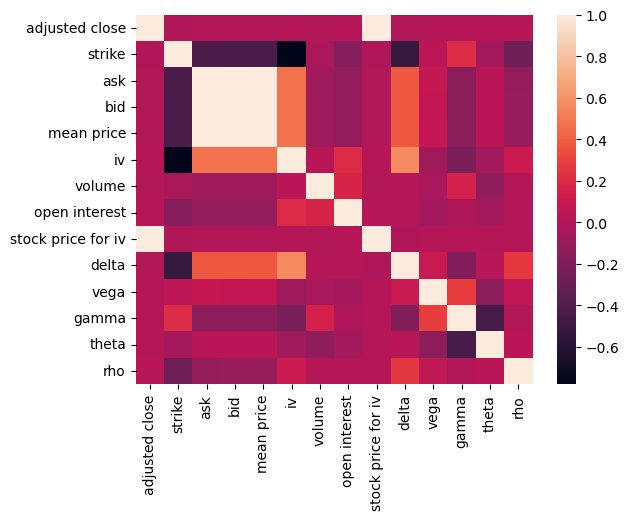

In [147]:
# Checking the correlation

sns.heatmap(df[numerical_columns].corr())

c:\Users\shish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


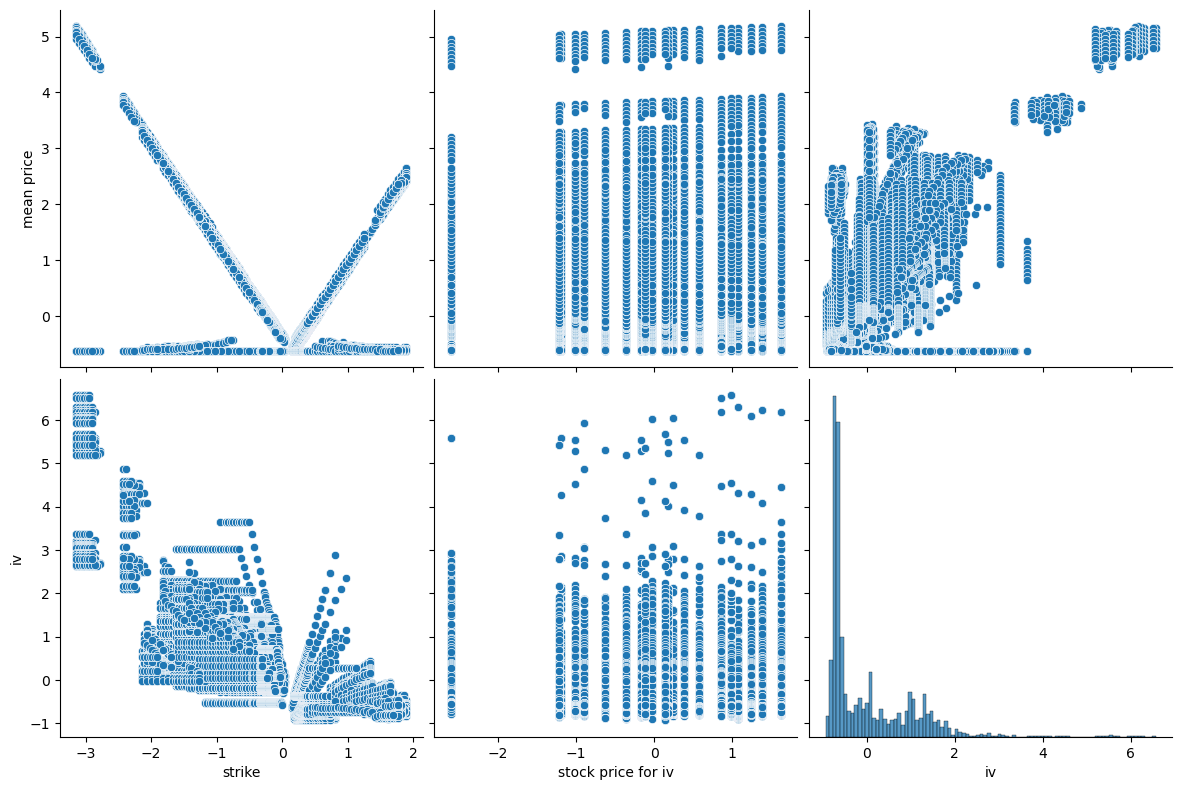

In [148]:
sns.pairplot(df, x_vars=[ 'strike',  'stock price for iv','iv' ], y_vars = ['mean price',  'iv'], height = 4, kind = 'scatter' )

In [149]:
# Removing the column which contains noise
# columns_to_remove = ["adjusted close" ,"symbol", "exchange", "option symbol", "expiration", "style", "*"]
# df.drop(columns=columns_to_remove, inplace=True)
# df.head()
numerical_columns

['adjusted close',
 'strike',
 'ask',
 'bid',
 'mean price',
 'iv',
 'volume',
 'open interest',
 'stock price for iv',
 'delta',
 'vega',
 'gamma',
 'theta',
 'rho']

In [174]:
#  Linear Regression

# Input variables selected with the highest correlation coefficient with the mean price
input_variables = ['iv']


X_train=df[df.date=="07/30/2021"][input_variables]
X_test=df[df.date!="07/30/2021"][input_variables]

y_train=df[df.date=="07/30/2021"]['mean price']
y_test=df[df.date!="07/30/2021"]['mean price']

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.7860898312170317


Text(0, 0.5, 'mean price')

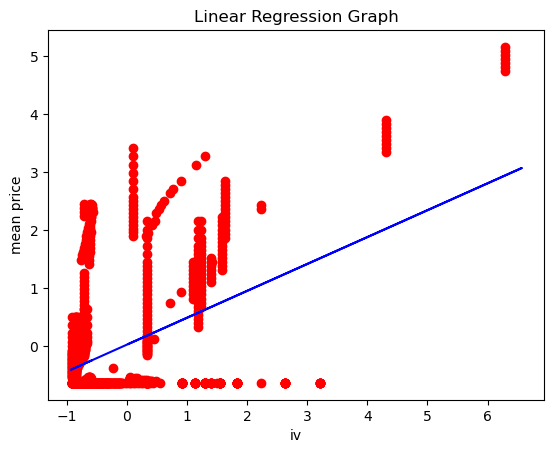

In [169]:
#Visualizing the results of linear regression
plt.scatter(X_train.iloc[:,0], y_train, color = 'red')
plt.plot(X_test.iloc[:,0], model.predict(X_test), color = 'blue') 
plt.title('Linear Regression Graph')
plt.xlabel('iv')
plt.ylabel('mean price')

In [188]:
df[numerical_columns].shape

(29039, 14)

In [207]:
from sklearn.decomposition import PCA
pca=PCA(0.90)
X=df[numerical_columns]
y=df.iv
X_pca=pca.fit_transform(X)
X_pca.shape

(29039, 8)

In [193]:
pca.explained_variance_ratio_

array([0.28785944, 0.14285071, 0.12560396, 0.11485498, 0.0855519 ,
       0.06097447, 0.05770012, 0.04567648])

In [216]:
#  Linear Regression using Dimension Reduction (PCA)



X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y,test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

y_pred_pca = model.predict(X_test_pca)
mse = mean_squared_error(y_test_pca, y_pred_pca)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.13983683986172263


Without Using PCA Mean Squared Error:  0.7860898312170317
Using PCA Mean Squared Error:  0.13983683986172263